In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
path = '/zhome/27/c/138037/share'
#model_list = os.listdir(cwd + '/Models')
#print(model_list)

In [3]:
#train = np.load('train_featuredata.npy')
#np.save('train_featuredata2.npy', train[1:])
#test = np.load('test_featuredata.npy')
#np.save('test_featuredata2.npy', test[1:])
train = np.load('train_featuredata2.npy')
test = np.load('test_featuredata2.npy')
true = np.load('/zhome/27/c/138037/foss/src/true_labels.npy')
pred_cnn = np.load('/zhome/27/c/138037/foss/src/predictions.npy')
pred_res = np.load('/zhome/27/c/138037/foss/src/predictions_resnet.npy')
pred_tree = np.load('/zhome/27/c/138037/share/src/predictions_tree.npy')

X_train, X_test = train[:,:-1], test[:,:-1]
y_train, y_test = train[:,-1], test[:,-1]

In [175]:
print(y_test.shape)
print(true.shape)

(6600,)
(6600,)


In [ ]:
'''
statistic = (Yes/No - No/Yes)^2 / (Yes/No + No/Yes)
'''


In [5]:
#Showing that both feature-selected dataset and the original dataset are equevalent
np.where(true != y_test)


(array([], dtype=int64),)

In [ ]:
model = str(f'n_est={n_estimators}-lr={lr}-max-depth={max_depth}-seed={seed}')
model_hist = str(f'HistGBDT-max_iter={max_iter}-early_stopping={str(early_stopping)}-seed={seed}')
clf = load('../Models/' + model + '.joblib')
clf_hist = load('../Models/' + model_hist + '.joblib')

In [37]:
clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth, random_state=seed).fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)

In [38]:
clf_hist = HistGradientBoostingClassifier(max_iter=max_iter, random_state=seed, early_stopping=early_stopping, learning_rate=lr ).fit(X_train, y_train)
clf_hist_score = clf_hist.score(X_test, y_test)

In [81]:
clf_hist.predict(X_test[6000].reshape(-1,12)).shape

(1,)

In [39]:
print('Height, Width, Depth, Size, intensity[0]-[6], Nearest cluster mean') 
print(f'GradientBoostingDecessionTree: \n score: {clf_score} \n feature importance: {clf.feature_importances_} \n \nHistGradientBoostingDecessionTree: \n score: {clf_hist_score}') #\n feature importance: {clf_hist.feature_importances_}')

Height, Width, Depth, Size, intensity[0]-[6], Nearest cluster mean
GradientBoostingDecessionTree: 
 score: 0.8821390698379034 
 feature importance: [0.18308653 0.23332156 0.00290214 0.02553493 0.0387962  0.03152474
 0.0308215  0.0108921  0.07289873 0.00063688 0.00903318 0.36055152] 
 
HistGradientBoostingDecessionTree: 
 score: 0.9639448568398727


In [190]:
pred_tree = np.zeros(len(X_test))

for X,i in zip(X_test, range(len(X_test)-1)):
    pred_tree[i] = clf_hist.predict(X.reshape(-1,12))

print(pred_tree.shape)
np.save('predictions_tree.npy', pred_tree)

(6600,)


(6600,)

In [40]:
dump(clf, '../Models/' + model + '.joblib') 
dump(clf_hist, '../Models/' + model_hist + '.joblib')

['../Models/HistGBDT-max_iter=1000-early_stopping=False-seed=10.joblib']

In [192]:
confusion_matrix(true_cnn, pred_tree)

array([[2915,    0,   50,    5,   30],
       [   8,   87,    1,    2,    2],
       [  57,    0, 1417,   18,    8],
       [   6,    0,   11,  868,   15],
       [   8,    2,    1,   15, 1074]])

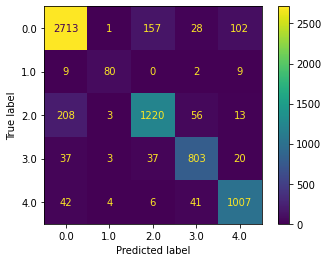

In [116]:
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

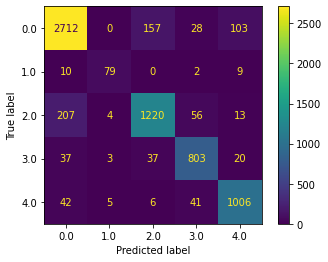

In [121]:
plot_confusion_matrix(clf, X_test[:-1], true_cnn)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [11]:
balanced_accuracy_score(true,pred_res)

0.9163757575757575

In [124]:
true_cnn = np.load('/zhome/27/c/138037/foss/src/true_labels.npy')
pred_cnn = np.load('/zhome/27/c/138037/foss/src/predictions.npy')

In [150]:
np.ma.where(true_cnn != y_test)

/zhome/27/c/138037/share/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([0]),)

In [151]:
mask = np.ma.where(true_cnn != y_test[:-1])

In [152]:
true_cnn[mask]

array([2, 1, 4, 0, 3])

In [140]:
y_test[:-1][mask]

array([0., 2., 1., 4., 0.])

In [ ]:
clf_h